<a href="https://colab.research.google.com/github/Pallavis21/Amazon-sales-Analysis/blob/main/Amazon_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Amazon Sales Data Analysis – Q2 2022
### Goal: Increase Revenue & Improve Product Category Performance

## Importing Libraries & Loading Dataset

Imported pandas and visualization libraries. Loaded the Amazon sales dataset into a DataFrame.


### Importing useful modules or libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm

### Importing data in notebook

In [3]:
df = pd.read_csv("/content/Amazon_sales_dataset.csv",low_memory=False)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72814,72814,171-3745272-8588345,5/12/2022,Shipped,Amazon,Amazon.in,Expedited,PJNE3373,PJNE3373-KR-N-6XL,kurta,...,INR,836.00,VARANASI,UTTAR PRADESH,221106.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
72815,72815,403-1953339-4696307,5/12/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-S,kurta,...,INR,353.00,KOLKATA,WEST BENGAL,700107.0,IN,NaN,False,NaN,False
72816,72816,407-7512498-5197115,5/12/2022,Cancelled,Amazon,Amazon.in,Expedited,JNE3675,JNE3675-TU-XXXL,Top,...,INR,574.00,PUNE,MAHARASHTRA,411014.0,IN,NaN,True,NaN,False
72817,72817,403-8405321-0170749,5/12/2022,Shipped,Amazon,Amazon.in,Expedited,BL006,BL006-54BLACK,Blouse,...,INR,388.00,GURUGRAM,HARYANA,122004.0,IN,NaN,False,NaN,False


## Data Cleaning & Preparation

Cleaned the dataset by dropping unnecessary columns, handling missing values, renaming fields, converting INR to USD, and filtering for Q2 2022 (April–June).


### Dropping unnamed 22, fullfilled-by,ship-country, currency,sales channel



In [4]:
columns_to_drop = ['Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel ']
df = df.drop(columns=columns_to_drop)
df

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72814,72814,171-3745272-8588345,5/12/2022,Shipped,Amazon,Expedited,PJNE3373,PJNE3373-KR-N-6XL,kurta,6XL,B09LD3TCYP,Shipped,1,836.00,VARANASI,UTTAR PRADESH,221106.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
72815,72815,403-1953339-4696307,5/12/2022,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-S,kurta,S,B07WS16S49,Shipped,1,353.00,KOLKATA,WEST BENGAL,700107.0,NaN,False
72816,72816,407-7512498-5197115,5/12/2022,Cancelled,Amazon,Expedited,JNE3675,JNE3675-TU-XXXL,Top,3XL,B0943DKGXG,Unshipped,1,574.00,PUNE,MAHARASHTRA,411014.0,NaN,True
72817,72817,403-8405321-0170749,5/12/2022,Shipped,Amazon,Expedited,BL006,BL006-54BLACK,Blouse,Free,B0785Q1NDR,Shipped,1,388.00,GURUGRAM,HARYANA,122004.0,NaN,False


### Columns dropduplicates()

Order and ASIN- have 7 duplicated values based on order and product(ASIN)

In [5]:
df = df.drop_duplicates(subset=['Order ID', 'ASIN'])
df

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72814,72814,171-3745272-8588345,5/12/2022,Shipped,Amazon,Expedited,PJNE3373,PJNE3373-KR-N-6XL,kurta,6XL,B09LD3TCYP,Shipped,1,836.00,VARANASI,UTTAR PRADESH,221106.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
72815,72815,403-1953339-4696307,5/12/2022,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-S,kurta,S,B07WS16S49,Shipped,1,353.00,KOLKATA,WEST BENGAL,700107.0,NaN,False
72816,72816,407-7512498-5197115,5/12/2022,Cancelled,Amazon,Expedited,JNE3675,JNE3675-TU-XXXL,Top,3XL,B0943DKGXG,Unshipped,1,574.00,PUNE,MAHARASHTRA,411014.0,NaN,True
72817,72817,403-8405321-0170749,5/12/2022,Shipped,Amazon,Expedited,BL006,BL006-54BLACK,Blouse,Free,B0785Q1NDR,Shipped,1,388.00,GURUGRAM,HARYANA,122004.0,NaN,False


### Columns fillna()

Courier Status - will fill missing with 'Unknown'

promotion-ids -  will fill missing with 'No Promotion'

Amount - will fill missing with 0, since 97% of all Order with missing Amount are cancelled

In [6]:
fill_na_values = {'Courier Status': 'Unknown', 'promotion-ids': 'No Promotion', 'Amount': 0}
df = df.fillna(fill_na_values)
df

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,No Promotion,False
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion,False
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,No Promotion,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72814,72814,171-3745272-8588345,5/12/2022,Shipped,Amazon,Expedited,PJNE3373,PJNE3373-KR-N-6XL,kurta,6XL,B09LD3TCYP,Shipped,1,836.00,VARANASI,UTTAR PRADESH,221106.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
72815,72815,403-1953339-4696307,5/12/2022,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-S,kurta,S,B07WS16S49,Shipped,1,353.00,KOLKATA,WEST BENGAL,700107.0,No Promotion,False
72816,72816,407-7512498-5197115,5/12/2022,Cancelled,Amazon,Expedited,JNE3675,JNE3675-TU-XXXL,Top,3XL,B0943DKGXG,Unshipped,1,574.00,PUNE,MAHARASHTRA,411014.0,No Promotion,True
72817,72817,403-8405321-0170749,5/12/2022,Shipped,Amazon,Expedited,BL006,BL006-54BLACK,Blouse,Free,B0785Q1NDR,Shipped,1,388.00,GURUGRAM,HARYANA,122004.0,No Promotion,False


### Column Renaming and changing values

Replace a specific column name

In [7]:
column_name_dict ={'B2B': 'customer_type', 'Amount': 'order_amount_($)'}
df = df.rename(columns=column_name_dict)
df

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,order_amount_($),ship-city,ship-state,ship-postal-code,promotion-ids,customer_type
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,No Promotion,False
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion,False
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,No Promotion,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72814,72814,171-3745272-8588345,5/12/2022,Shipped,Amazon,Expedited,PJNE3373,PJNE3373-KR-N-6XL,kurta,6XL,B09LD3TCYP,Shipped,1,836.00,VARANASI,UTTAR PRADESH,221106.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
72815,72815,403-1953339-4696307,5/12/2022,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-S,kurta,S,B07WS16S49,Shipped,1,353.00,KOLKATA,WEST BENGAL,700107.0,No Promotion,False
72816,72816,407-7512498-5197115,5/12/2022,Cancelled,Amazon,Expedited,JNE3675,JNE3675-TU-XXXL,Top,3XL,B0943DKGXG,Unshipped,1,574.00,PUNE,MAHARASHTRA,411014.0,No Promotion,True
72817,72817,403-8405321-0170749,5/12/2022,Shipped,Amazon,Expedited,BL006,BL006-54BLACK,Blouse,Free,B0785Q1NDR,Shipped,1,388.00,GURUGRAM,HARYANA,122004.0,No Promotion,False


### B2B - changing to customer_type and changing the values to business and customer

In [8]:
df['customer_type'] = df['customer_type'].astype(str)
df['customer_type'] = df['customer_type'].str.strip().replace({'True': 'Business', 'False': 'Customer'})

df

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,order_amount_($),ship-city,ship-state,ship-postal-code,promotion-ids,customer_type
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,No Promotion,Customer
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Business
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion,Customer
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,No Promotion,Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72814,72814,171-3745272-8588345,5/12/2022,Shipped,Amazon,Expedited,PJNE3373,PJNE3373-KR-N-6XL,kurta,6XL,B09LD3TCYP,Shipped,1,836.00,VARANASI,UTTAR PRADESH,221106.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Customer
72815,72815,403-1953339-4696307,5/12/2022,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-S,kurta,S,B07WS16S49,Shipped,1,353.00,KOLKATA,WEST BENGAL,700107.0,No Promotion,Customer
72816,72816,407-7512498-5197115,5/12/2022,Cancelled,Amazon,Expedited,JNE3675,JNE3675-TU-XXXL,Top,3XL,B0943DKGXG,Unshipped,1,574.00,PUNE,MAHARASHTRA,411014.0,No Promotion,Business
72817,72817,403-8405321-0170749,5/12/2022,Shipped,Amazon,Expedited,BL006,BL006-54BLACK,Blouse,Free,B0785Q1NDR,Shipped,1,388.00,GURUGRAM,HARYANA,122004.0,No Promotion,Customer


###Amount: changing to order_amount() and converting form INR to $

In [9]:
exchange_rate = 0.0120988
df['order_amount_($)'] = (df['order_amount_($)'].apply(lambda x: x * exchange_rate)).round(2)
df

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,order_amount_($),ship-city,ship-state,ship-postal-code,promotion-ids,customer_type
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,7.84,MUMBAI,MAHARASHTRA,400081.0,No Promotion,Customer
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,4.91,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,3.98,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Business
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,9.11,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion,Customer
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,6.94,CHENNAI,TAMIL NADU,600073.0,No Promotion,Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72814,72814,171-3745272-8588345,5/12/2022,Shipped,Amazon,Expedited,PJNE3373,PJNE3373-KR-N-6XL,kurta,6XL,B09LD3TCYP,Shipped,1,10.11,VARANASI,UTTAR PRADESH,221106.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Customer
72815,72815,403-1953339-4696307,5/12/2022,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-S,kurta,S,B07WS16S49,Shipped,1,4.27,KOLKATA,WEST BENGAL,700107.0,No Promotion,Customer
72816,72816,407-7512498-5197115,5/12/2022,Cancelled,Amazon,Expedited,JNE3675,JNE3675-TU-XXXL,Top,3XL,B0943DKGXG,Unshipped,1,6.94,PUNE,MAHARASHTRA,411014.0,No Promotion,Business
72817,72817,403-8405321-0170749,5/12/2022,Shipped,Amazon,Expedited,BL006,BL006-54BLACK,Blouse,Free,B0785Q1NDR,Shipped,1,4.69,GURUGRAM,HARYANA,122004.0,No Promotion,Customer


### Convert Date and Filter April–June 2022

In [10]:
df["Date"]=pd.to_datetime(df["Date"])
s='2022-04-01'
e='2022-06-29'
df=df.query('Date >=@s and Date<= @e')
df

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,order_amount_($),ship-city,ship-state,ship-postal-code,promotion-ids,customer_type
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,7.84,MUMBAI,MAHARASHTRA,400081.0,No Promotion,Customer
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,4.91,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,3.98,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Business
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,9.11,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion,Customer
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,6.94,CHENNAI,TAMIL NADU,600073.0,No Promotion,Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72814,72814,171-3745272-8588345,2022-05-12,Shipped,Amazon,Expedited,PJNE3373,PJNE3373-KR-N-6XL,kurta,6XL,B09LD3TCYP,Shipped,1,10.11,VARANASI,UTTAR PRADESH,221106.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Customer
72815,72815,403-1953339-4696307,2022-05-12,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-S,kurta,S,B07WS16S49,Shipped,1,4.27,KOLKATA,WEST BENGAL,700107.0,No Promotion,Customer
72816,72816,407-7512498-5197115,2022-05-12,Cancelled,Amazon,Expedited,JNE3675,JNE3675-TU-XXXL,Top,3XL,B0943DKGXG,Unshipped,1,6.94,PUNE,MAHARASHTRA,411014.0,No Promotion,Business
72817,72817,403-8405321-0170749,2022-05-12,Shipped,Amazon,Expedited,BL006,BL006-54BLACK,Blouse,Free,B0785Q1NDR,Shipped,1,4.69,GURUGRAM,HARYANA,122004.0,No Promotion,Customer


###Create month and order size column

In [11]:
#create month column
df['Month'] = df['Date'].dt.month_name()
df


/tmp/ipython-input-11-832533047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month_name()


,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,order_amount_($),ship-city,ship-state,ship-postal-code,promotion-ids,customer_type,Month
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,7.84,MUMBAI,MAHARASHTRA,400081.0,No Promotion,Customer,April
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,4.91,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer,April
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,3.98,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Business,April
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,9.11,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion,Customer,April
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,6.94,CHENNAI,TAMIL NADU,600073.0,No Promotion,Customer,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72814,72814,171-3745272-8588345,2022-05-12,Shipped,Amazon,Expedited,PJNE3373,PJNE3373-KR-N-6XL,kurta,6XL,B09LD3TCYP,Shipped,1,10.11,VARANASI,UTTAR PRADESH,221106.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Customer,May
72815,72815,403-1953339-4696307,2022-05-12,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-S,kurta,S,B07WS16S49,Shipped,1,4.27,KOLKATA,WEST BENGAL,700107.0,No Promotion,Customer,May
72816,72816,407-7512498-5197115,2022-05-12,Cancelled,Amazon,Expedited,JNE3675,JNE3675-TU-XXXL,Top,3XL,B0943DKGXG,Unshipped,1,6.94,PUNE,MAHARASHTRA,411014.0,No Promotion,Business,May
72817,72817,403-8405321-0170749,2022-05-12,Shipped,Amazon,Expedited,BL006,BL006-54BLACK,Blouse,Free,B0785Q1NDR,Shipped,1,4.69,GURUGRAM,HARYANA,122004.0,No Promotion,Customer,May


In [12]:
#Order Size column
size_order = ['XS','S','M','L','XL','XXL','3XL','4XL','5XL','6XL','Free']
df['size'] = pd.Categorical(df['Size'], categories=size_order, ordered=True)
df

/tmp/ipython-input-12-2735494777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = pd.Categorical(df['Size'], categories=size_order, ordered=True)


,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,order_amount_($),ship-city,ship-state,ship-postal-code,promotion-ids,customer_type,Month,size
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,...,Unknown,0,7.84,MUMBAI,MAHARASHTRA,400081.0,No Promotion,Customer,April,S
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,Shipped,1,4.91,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Customer,April,3XL
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,Shipped,1,3.98,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Business,April,XL
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,...,Unknown,0,9.11,PUDUCHERRY,PUDUCHERRY,605008.0,No Promotion,Customer,April,L
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,Shipped,1,6.94,CHENNAI,TAMIL NADU,600073.0,No Promotion,Customer,April,3XL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72814,72814,171-3745272-8588345,2022-05-12,Shipped,Amazon,Expedited,PJNE3373,PJNE3373-KR-N-6XL,kurta,6XL,...,Shipped,1,10.11,VARANASI,UTTAR PRADESH,221106.0,IN Core Free Shipping 2015/04/08 23-48-5-108,Customer,May,6XL
72815,72815,403-1953339-4696307,2022-05-12,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-S,kurta,S,...,Shipped,1,4.27,KOLKATA,WEST BENGAL,700107.0,No Promotion,Customer,May,S
72816,72816,407-7512498-5197115,2022-05-12,Cancelled,Amazon,Expedited,JNE3675,JNE3675-TU-XXXL,Top,3XL,...,Unshipped,1,6.94,PUNE,MAHARASHTRA,411014.0,No Promotion,Business,May,3XL
72817,72817,403-8405321-0170749,2022-05-12,Shipped,Amazon,Expedited,BL006,BL006-54BLACK,Blouse,Free,...,Shipped,1,4.69,GURUGRAM,HARYANA,122004.0,No Promotion,Customer,May,Free


###Standardize State Names

In [13]:
replace_dict = {
'Rajsthan': 'RAJASTHAN',
'rajsthan': 'RAJASTHAN',
'RJ': 'RAJASTHAN',
'rjasthan': 'RAJASTHAN',
'Goa':'GOA',
'goa': 'GOA',
'Arunachal pradesh':'ARUNACHAL PRADESH',
'rajasthan':'RAJASTHAN',
'AR':'ARUNACHAL PRADESH',
'PB':'punjab',
'NL':'NAGALAND',
'delhi':'DELHI',
'New Delhi':'DELHI',
'Delhi':'DELHI',
'Punjab':'PUNJAB',
'punjab':'PUNJAB',
'PUDUCHERRY':'PONDICHERRY',
'Pondicherry': 'PONDICHERRY',
'Sikkim':'SIKKIM',
'Nagaland':'NAGALAND',
'Mizoram':'MIZORAM',
'Rajasthan':'RAJASTHAN',
'orissa':'ODISHA',
'Orissa':'ODISHA',
'Odisha':'ODISHA',
'ORISSA':'ODISHA',
'Puducherry':'PONDICHERRY',
'Chandigarh':'CHANDIGARH',
'Bihar':'BIHAR',
'Rajshthan':'RAJASTHAN',
'bihar':'BIHAR',
'Arunachal Pradesh':'ARUNACHAL PRADESH',
'Punjab':'PUNJAB',
'Punjab/Mohali/Zirakpur':'PUNJAB',
'Meghalaya':'MEGHALAYA',
'Manipur':'MANIPUR'
 }
df['ship-state'] = df['ship-state'].replace(replace_dict)
df['ship-state'].unique()


/tmp/ipython-input-13-2151526194.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ship-state'] = df['ship-state'].replace(replace_dict)


array(['MAHARASHTRA', 'KARNATAKA', 'PONDICHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'GOA', 'MEGHALAYA', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR ',
       'MIZORAM', 'LAKSHADWEEP', 'punjab', 'APO'], dtype=object)

## Visualizations & Exploratory Data Analysis (EDA)
This section includes various visual insights like top categories, state-wise sales, customer behavior, and promotion effectiveness to support decision-making for increasing revenue and improving category performance.


 ### Top 3 Categories by Total Sales Amount

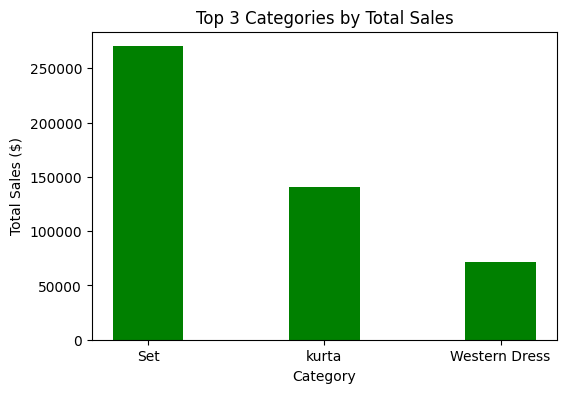

In [26]:
# Group and get top 3 categories
grouped_df = df.groupby('Category')['order_amount_($)'].sum().reset_index()
top3 = grouped_df.nlargest(3, 'order_amount_($)')

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(top3['Category'], top3['order_amount_($)'], color='green', width=0.4)
plt.title('Top 3 Categories by Total Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')

# Save as PNG
plt.savefig('top3_categories.png')

# Show the chart
plt.show()

###  Bottom 3 Categories by Total Sales Amount

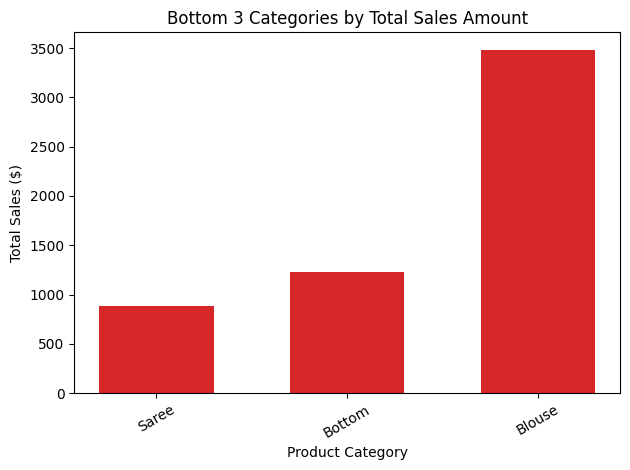

In [15]:
# Get bottom 3 categories
bottom3_categories = grouped_df.nsmallest(3, 'order_amount_($)')

# Plot
plt.bar(bottom3_categories['Category'], bottom3_categories['order_amount_($)'], color='#D62728', width=0.6)
plt.title('Bottom 3 Categories by Total Sales Amount')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("bottom_3_categories_sales.png")
plt.show()

### Month-wise Revenue Trend

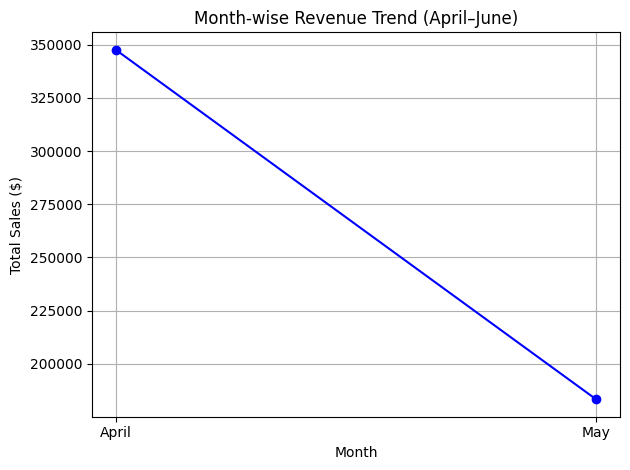

In [16]:
# Group by month and calculate total revenue
monthly_sales = df.groupby('Month')['order_amount_($)'].sum().reindex(['April', 'May', 'June'])

# Plot line chart
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='blue')
plt.title('Month-wise Revenue Trend (April–June)')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.savefig("monthly_revenue_trend.png")
plt.show()


 ##Top 5 Categories by Average Order Price

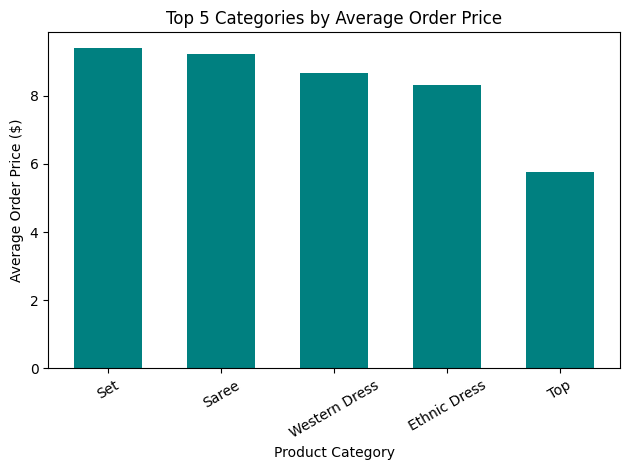

In [20]:
# Group and prepare data
avg_price = df.groupby('Category')['order_amount_($)'].mean().sort_values(ascending=False).head(5)

# Plot
plt.bar(avg_price.index, avg_price.values, color='teal', width=0.6)
plt.title('Top 5 Categories by Average Order Price')
plt.xlabel('Product Category')
plt.ylabel('Average Order Price ($)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("top_5_avg_price_categories.png")
plt.show()

### Average Order Amount by Customer Type

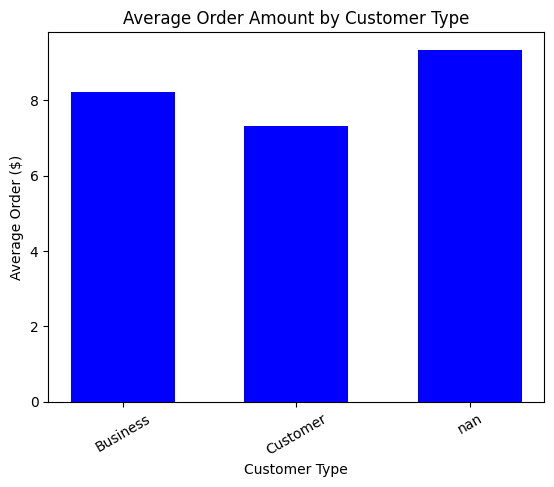

In [21]:
customer_avg = df.groupby('customer_type')['order_amount_($)'].mean()

plt.bar(customer_avg.index, customer_avg.values, color='blue',width=0.6)
plt.title('Average Order Amount by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Order ($)')
plt.xticks(rotation=30)
plt.savefig("avg_order_by_customer_type.png")
plt.show()

### Top 5 States by Sales

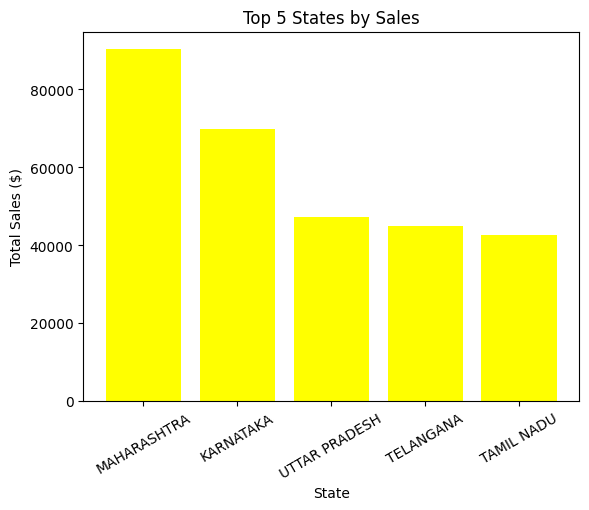

In [28]:

top_states = df.groupby('ship-state')['order_amount_($)'].sum().sort_values(ascending=False).head(5)

plt.bar(top_states.index, top_states.values, color='yellow')
plt.title('Top 5 States by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=30)
plt.savefig("top_5_states_sales.png")
plt.show()

### Promotion-wise Sales Comparison

/tmp/ipython-input-23-1646138026.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



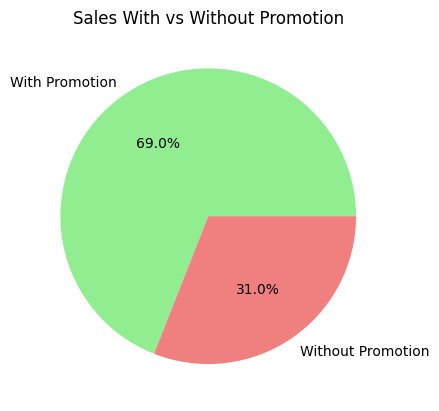

In [23]:
df['promotion_status'] = df['promotion-ids'].apply(lambda x: 'With Promotion' if x != 'No Promotion' else 'Without Promotion')
promotion_sales = df.groupby('promotion_status')['order_amount_($)'].sum()

plt.pie(promotion_sales.values, labels=promotion_sales.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Sales With vs Without Promotion')
plt.savefig("promotion_sales_pie.png")
plt.show()


### Western Dress Sales by State (Top 5)

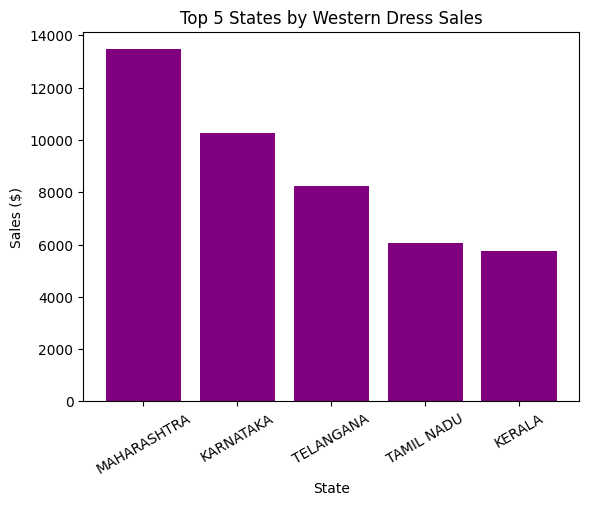

In [27]:
western = df[df['Category'] == 'Western Dress']

# Step 2: Group by state and take top 5 by sales
western_state_sales = western.groupby('ship-state')['order_amount_($)'].sum()
western_state_sales = western_state_sales.sort_values(ascending=False).head(5)

# Step 3: Plot bar chart
plt.bar(western_state_sales.index, western_state_sales.values, color='purple')

# Step 4: Add title and labels
plt.title('Top 5 States by Western Dress Sales')
plt.xlabel('State')
plt.ylabel('Sales ($)')

# Step 5: Rotate x labels for better visibility
plt.xticks(rotation=30)

# Step 6: Save the graph as an image
plt.savefig("western_dress_sales.png")

# Step 7: Show the graph
plt.show()

### Bottom 3 Categories Sales by Top States

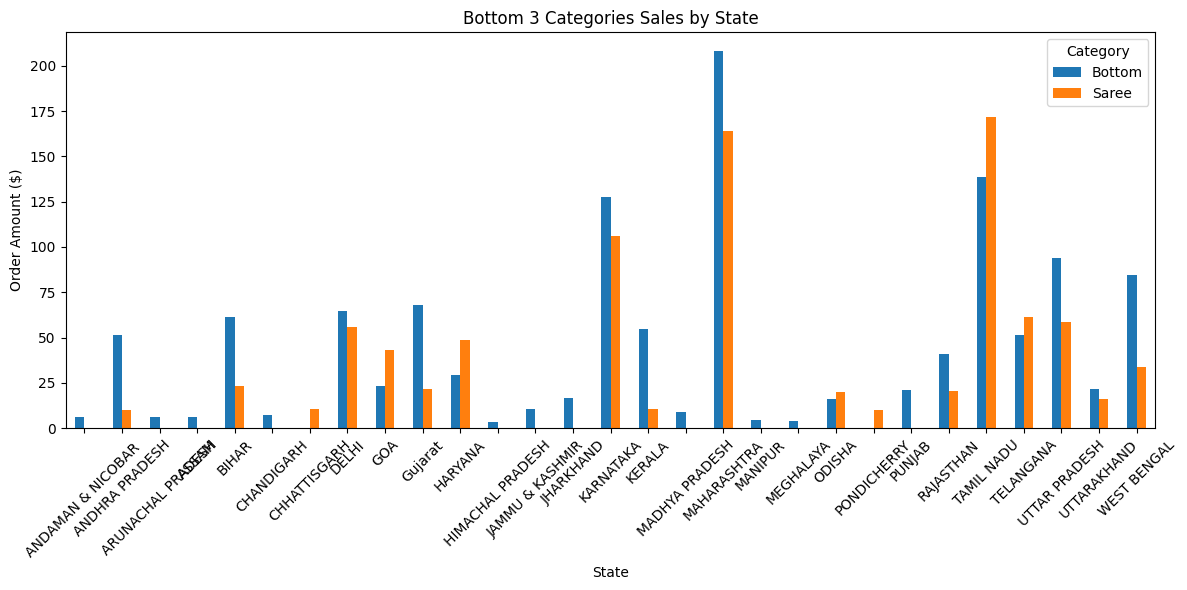

In [25]:
# Define bottom 3 categories
bottom_categories = ['Dupatta', 'Saree', 'Bottom']

# Filter and group
bottom_df = df[df['Category'].isin(bottom_categories)]
bottom_state_sales = bottom_df.groupby(['ship-state', 'Category'])['order_amount_($)'].sum().unstack().fillna(0)

# Plot
bottom_state_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Bottom 3 Categories Sales by State')
plt.xlabel('State')
plt.ylabel('Order Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig("bottom_categories_sales_matplotlib.png")


plt.show()



## ## 📌 Summary & Business Recommendations

- **Top Revenue Categories**: Set, Kurta, and Western Dress dominate sales.
- **Opportunity**: Western Dress contributes 14% of revenue—can be increased with targeted marketing.
- **High-Value Customers**: Business customers spend more than regular ones.
- **Best-Performing States**: Maharashtra, Karnataka, Telangana lead in sales.
- **Promotion Insights**: Promotions generate ~68% of total revenue.
- **Action Plan**:
  - Promote Western Dress in top 5 states.
  - Introduce offers for underperforming categories (Saree, Dupatta, Bottom).
  - Plan Q3 promotions to reverse declining trend from April to June.